# PROJECT: chatGPT effect on coding
## Diff-in-Diff

- FIRST VERSION  08.08.2023
- THIS VERSION   29.08.2023

- AUTHOR      		QG
- LAST REVISOR		QG

- Log of revisions: Using latest data with reputation and length


In [1]:
!pip install linearmodels
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from datetime import datetime
import linearmodels as lm
from linearmodels import PanelOLS
from IPython.display import Image, display
import matplotlib.dates as mdates
from linearmodels.panel.results import compare

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00


In [2]:
#import the combined data
df = pd.read_csv('master_p_r.csv')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

df.describe(include='all')

,python,date,length,reputation,vote,view,answer,accept,question,vote_neg,...,view_mean,vote_neg_mean,noanswer_mean,top10_p,top50_p,top75_p,accept_mean,length_mean,length_trunc_mean,week
count,44.000000,44,4.400000e+01,4.400000e+01,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.500000,2022-12-29 12:00:00,4.930619e+06,2.187458e+06,666.909091,4.673568e+05,2493.136364,953.500000,2666.772727,245.022727,...,142.491891,0.066703,0.318011,0.113684,0.532023,0.289522,0.390673,1925.795670,1686.644553,11.500000
min,0.000000,2022-10-17 00:00:00,1.257349e+06,5.771180e+05,339.000000,5.566600e+04,643.000000,280.000000,588.000000,14.000000,...,73.600220,0.013793,0.260204,0.082865,0.441011,0.207171,0.323954,1701.167613,1534.145878,1.000000
25%,0.000000,2022-11-21 00:00:00,1.909790e+06,9.755885e+05,483.250000,8.367275e+04,954.750000,415.250000,961.750000,25.750000,...,95.342328,0.026267,0.303426,0.094531,0.468299,0.227306,0.337020,1806.864216,1612.411794,6.000000
50%,0.500000,2022-12-29 12:00:00,4.322554e+06,1.885100e+06,706.000000,3.052910e+05,2127.000000,824.500000,2300.500000,196.500000,...,124.428262,0.067322,0.318626,0.105625,0.522967,0.280278,0.386015,1900.456454,1682.634368,11.500000
75%,1.000000,2023-02-06 00:00:00,7.749156e+06,3.399834e+06,841.000000,8.071710e+05,3779.000000,1429.750000,4113.000000,431.000000,...,187.012579,0.104255,0.334721,0.129551,0.599600,0.346092,0.436138,2050.155974,1755.247638,17.000000
max,1.000000,2023-03-13 00:00:00,9.606102e+06,4.005321e+06,1016.000000,1.185755e+06,5099.000000,1895.000000,5331.000000,594.000000,...,249.666440,0.118824,0.364531,0.166460,0.649689,0.393789,0.492891,2353.916042,1860.551276,22.000000
std,0.505781,NaN,3.156641e+06,1.264100e+06,209.614465,4.088751e+05,1647.229098,575.007361,1814.663270,227.694051,...,54.244631,0.039688,0.025362,0.024819,0.071084,0.064807,0.055200,163.168470,87.433250,6.417636


FileNotFoundError: [Errno 2] No such file or directory: '/content/figure/fig1.png'

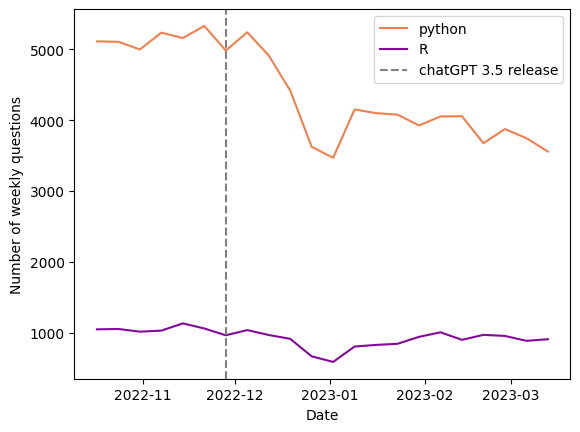

In [3]:

# Filter data for python==1 and python==0
python_1_data = df[df['python'] == 1]
python_0_data = df[df['python'] == 0]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for python==1 as a line
ax.plot(python_1_data['date'], python_1_data['question'], label='python', color='#EF804D')

# Plot the data for python==0 as a line
ax.plot(python_0_data['date'], python_0_data['question'], label='R', color='#840899')

# Add a vertical bar at the date '2022-11-28'
ax.axvline(pd.to_datetime('2022-11-28'), color='grey', linestyle='--', label='chatGPT 3.5 release')

# Add a vertical bar at the date '2022-11-28'
#ax.axvline(pd.to_datetime('2023-03-13'), color='grey', linestyle='--', label='chatGPT 4 release')


# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of weekly questions')
#ax.set_title('Number of questions posted on Stackoverflow weekly')
ax.legend()

# save plot
plt.savefig('./figure/fig1.png', dpi=500, bbox_inches='tight')


# Display the graph
plt.show()


In [4]:
# Set the index for fixed effects
df['id'] = df['python']
df['t'] = df['week']
df.reset_index(inplace=True)
df = df.set_index(['id', 't'])

In [5]:
reg1 = PanelOLS.from_formula('question ~ chatgpt*python+1', df)
res = reg1.fit(cov_type = 'clustered')
             #cluster_entity=True,
             # cluster_time=True

res

Dep. Variable:,question,R-squared:,0.9741
Estimator:,PanelOLS,R-squared (Between):,1.0000
No. Observations:,44,R-squared (Within):,0.6054
Date:,"Thu, Oct 10 2024",R-squared (Overall):,0.9741
Time:,09:39:10,Log-likelihood,-311.71
Cov. Estimator:,Clustered,,
,,F-statistic:,501.38
Entities:,2,P-value,0.0000
Avg Obs:,22.000,Distribution:,"F(3,40)"
Min Obs:,22.000,,
Max Obs:,22.000,F-statistic (robust):,2593.3


FileNotFoundError: [Errno 2] No such file or directory: '/content/figure/did_question.png'

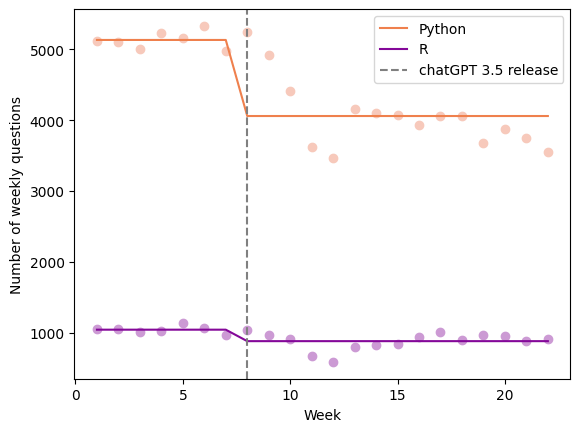

In [6]:
coef_chatgpt_python = res.params['chatgpt:python']

# Create a plot to visualize the DiD effect
#plt.figure(figsize=(8, 6))

# Plot the actual data (lighter color)
plt.scatter(df[df['python']==1]['week'], df[df['python']==1]['question'], color='#F7C9BB')

plt.scatter(df[df['python']==0]['week'], df[df['python']==0]['question'], color='#CC9AD4')

# Predict values based on the model
df['predicted'] = res.predict()
plt.plot(df[df['python']==1]['week'], df[df['python']==1]['predicted'], color='#EF804D', label='Python')
plt.plot(df[df['python']==0]['week'], df[df['python']==0]['predicted'],  color='#840899', label='R')

# Add a vertical bar at the date '2022-11-28'
plt.axvline(x=8, color='grey', linestyle='--', label='chatGPT 3.5 release')  # Add vertical line

plt.xlabel('Week')
plt.ylabel('Number of weekly questions')
#plt.title('Difference-in-Differences (DiD) Effect')
plt.legend()


# save plot
plt.savefig('./figure/did_question.png', dpi=500, bbox_inches='tight')


# show plot
plt.show()



In [7]:
reg1 = PanelOLS.from_formula('vote_mean ~ chatgpt*python+1', df)
res = reg1.fit(cov_type = 'clustered')
             #cluster_entity=True,
             # cluster_time=True
res

Dep. Variable:,vote_mean,R-squared:,0.8672
Estimator:,PanelOLS,R-squared (Between):,1.0000
No. Observations:,44,R-squared (Within):,0.0673
Date:,"Thu, Oct 10 2024",R-squared (Overall):,0.8672
Time:,09:39:17,Log-likelihood,58.563
Cov. Estimator:,Clustered,,
,,F-statistic:,87.037
Entities:,2,P-value,0.0000
Avg Obs:,22.000,Distribution:,"F(3,40)"
Min Obs:,22.000,,
Max Obs:,22.000,F-statistic (robust):,105.11


FileNotFoundError: [Errno 2] No such file or directory: '/content/figure/did_vote_mean.png'

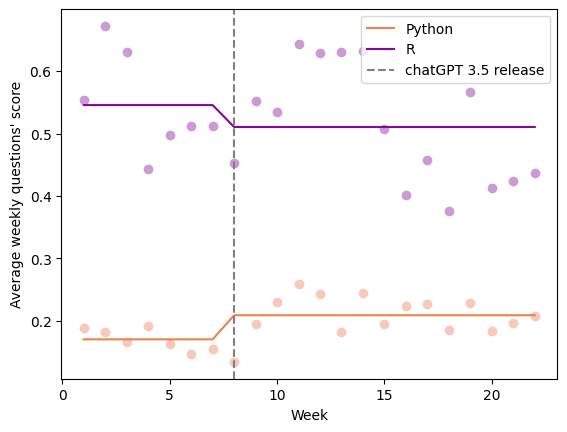

In [8]:
coef_chatgpt_python = res.params['chatgpt:python']

# Create a plot to visualize the DiD effect
#plt.figure(figsize=(8, 6))

# Plot the actual data (lighter color)
plt.scatter(df[df['python']==1]['week'], df[df['python']==1]['vote_mean'], color='#F7C9BB')

plt.scatter(df[df['python']==0]['week'], df[df['python']==0]['vote_mean'], color='#CC9AD4')

# Predict values based on the model
df['predicted'] = res.predict()
plt.plot(df[df['python']==1]['week'], df[df['python']==1]['predicted'], color='#EF804D', label='Python')
plt.plot(df[df['python']==0]['week'], df[df['python']==0]['predicted'],  color='#840899', label='R')

# Add a vertical bar at the date '2022-11-28'
plt.axvline(x=8, color='grey', linestyle='--', label='chatGPT 3.5 release')  # Add vertical line

plt.xlabel('Week')
plt.ylabel('Average weekly questions\' score')
#plt.title('Difference-in-Differences (DiD) Effect')
plt.legend()


# save plot
plt.savefig('./figure/did_vote_mean.png', dpi=500, bbox_inches='tight')

plt.show()

In [11]:
reg1 = PanelOLS.from_formula('noanswer_mean ~ chatgpt*python+1', df)
res = reg1.fit(cov_type = 'clustered')
             #cluster_entity=True,
             # cluster_time=True

res

Dep. Variable:,noanswer_mean,R-squared:,0.5699
Estimator:,PanelOLS,R-squared (Between):,1.0000
No. Observations:,44,R-squared (Within):,0.1067
Date:,"Thu, Oct 10 2024",R-squared (Overall):,0.5699
Time:,09:40:20,Log-likelihood,118.31
Cov. Estimator:,Clustered,,
,,F-statistic:,17.666
Entities:,2,P-value,0.0000
Avg Obs:,22.000,Distribution:,"F(3,40)"
Min Obs:,22.000,,
Max Obs:,22.000,F-statistic (robust):,17.471


FileNotFoundError: [Errno 2] No such file or directory: '/content/figure/did_noanswer.png'

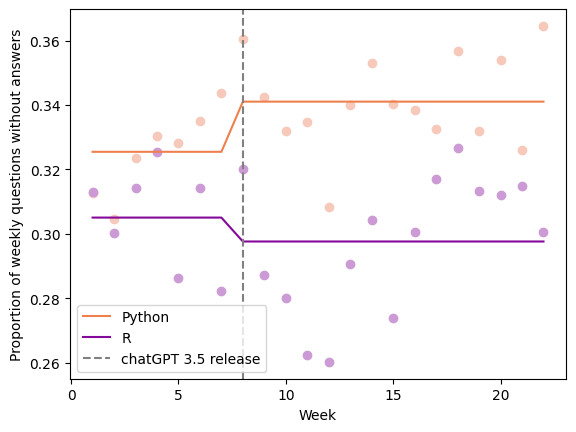

In [12]:
coef_chatgpt_python = res.params['chatgpt:python']

# Create a plot to visualize the DiD effect
#plt.figure(figsize=(8, 6))

# Plot the actual data (lighter color)
plt.scatter(df[df['python']==1]['week'], df[df['python']==1]['noanswer_mean'], color='#F7C9BB')

plt.scatter(df[df['python']==0]['week'], df[df['python']==0]['noanswer_mean'], color='#CC9AD4')

# Predict values based on the model
df['predicted'] = res.predict()
plt.plot(df[df['python']==1]['week'], df[df['python']==1]['predicted'], color='#EF804D', label='Python')
plt.plot(df[df['python']==0]['week'], df[df['python']==0]['predicted'],  color='#840899', label='R')

# Add a vertical bar at the date '2022-11-28'
plt.axvline(x=8, color='grey', linestyle='--', label='chatGPT 3.5 release')  # Add vertical line

plt.xlabel('Week')
plt.ylabel('Proportion of weekly questions without answers')
#plt.title('Difference-in-Differences (DiD) Effect')
plt.legend()


# save plot
plt.savefig('./figure/did_noanswer.png', dpi=500, bbox_inches='tight')


# show plot
plt.show()

In [13]:
reg1 = PanelOLS.from_formula('view_mean ~ chatgpt*python+1', df)
res = reg1.fit(cov_type = 'clustered')
             #cluster_entity=True,
             # cluster_time=True

res

Dep. Variable:,view_mean,R-squared:,0.8577
Estimator:,PanelOLS,R-squared (Between):,1.0000
No. Observations:,44,R-squared (Within):,0.1228
Date:,"Thu, Oct 10 2024",R-squared (Overall):,0.8577
Time:,09:42:05,Log-likelihood,-194.75
Cov. Estimator:,Clustered,,
,,F-statistic:,80.334
Entities:,2,P-value,0.0000
Avg Obs:,22.000,Distribution:,"F(3,40)"
Min Obs:,22.000,,
Max Obs:,22.000,F-statistic (robust):,100.83


FileNotFoundError: [Errno 2] No such file or directory: '/content/figure/did_view_mean.png'

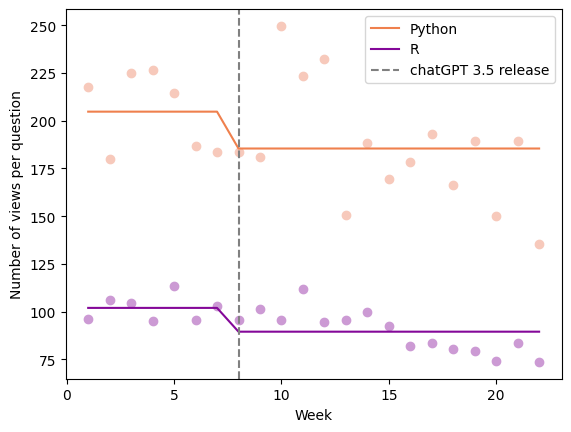

In [14]:
coef_chatgpt_python = res.params['chatgpt:python']

# Create a plot to visualize the DiD effect
#plt.figure(figsize=(8, 6))

# Plot the actual data (lighter color)
plt.scatter(df[df['python']==1]['week'], df[df['python']==1]['view_mean'], color='#F7C9BB')

plt.scatter(df[df['python']==0]['week'], df[df['python']==0]['view_mean'], color='#CC9AD4')

# Predict values based on the model
df['predicted'] = res.predict()
plt.plot(df[df['python']==1]['week'], df[df['python']==1]['predicted'], color='#EF804D', label='Python')
plt.plot(df[df['python']==0]['week'], df[df['python']==0]['predicted'],  color='#840899', label='R')

# Add a vertical bar at the date '2022-11-28'
plt.axvline(x=8, color='grey', linestyle='--', label='chatGPT 3.5 release')  # Add vertical line

plt.xlabel('Week')
plt.ylabel('Number of views per question')
#plt.title('Difference-in-Differences (DiD) Effect')
plt.legend()


# save plot
plt.savefig('./figure/did_view_mean.png', dpi=500, bbox_inches='tight')


# show plot
plt.show()